<a href="https://colab.research.google.com/github/profitter261/Video-Games-Sale-analysis-/blob/main/video_games_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Load Datasets

In [3]:
df1 = pd.read_csv('/content/games_cleaned.csv')

In [4]:
df2 = pd.read_csv('/content/vgsales_cleaned.csv')

In [5]:
df1.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
1,0,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
2,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
3,0,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900.0,3900.0,RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
4,1,Hades,"Dec 10, 2019",Supergiant Games,4.3,2900.0,2900.0,Adventure,A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21000.0,3200.0,6300.0,3600.0


#Text Cleaning

In [6]:
# Ensure Genre column is string and split by comma (and remove extra spaces)
df1['Genres'] = df1['Genres'].astype(str).str.split(',')

# Explode the Genre column
df1 = df1.explode('Genres')

# Strip any leading/trailing spaces after exploding
df1['Genres'] = df1['Genres'].str.strip()

# Reset index if needed
df1.reset_index(drop=True, inplace=True)

In [7]:
# Ensure Genre column is string and split by comma (and remove extra spaces)
df1['Team'] = df1['Team'].astype(str).str.split(',')

# Explode the Genre column
df1 = df1.explode('Team')

# Strip any leading/trailing spaces after exploding
df1['Team'] = df1['Team'].str.strip()

# Reset index if needed
df1.reset_index(drop=True, inplace=True)

In [8]:
df1

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
1,0,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
2,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
3,0,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900.0,3900.0,RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
4,1,Hades,"Dec 10, 2019",Supergiant Games,4.3,2900.0,2900.0,Adventure,A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21000.0,3200.0,6300.0,3600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6625,1510,Baldur's Gate 3,"Oct 06, 2020",Larian Studios,4.1,165.0,165.0,Turn Based Strategy,"An ancient evil has returned to Baldur's Gate,...","Bu tre bu oyunla girmeye almak hatayd sanrm, E...",269.0,79.0,388.0,602.0
6626,1511,The LEGO Movie Videogame,"Feb 04, 2014",WB Games,2.8,184.0,184.0,Adventure,Join Emmet and an unlikely group of resistance...,"Legal, Pretty Average Lego Game But It Was My ...",1700.0,11.0,239.0,73.0
6627,1511,The LEGO Movie Videogame,"Feb 04, 2014",TT Fusion,2.8,184.0,184.0,Adventure,Join Emmet and an unlikely group of resistance...,"Legal, Pretty Average Lego Game But It Was My ...",1700.0,11.0,239.0,73.0
6628,1511,The LEGO Movie Videogame,"Feb 04, 2014",WB Games,2.8,184.0,184.0,Puzzle,Join Emmet and an unlikely group of resistance...,"Legal, Pretty Average Lego Game But It Was My ...",1700.0,11.0,239.0,73.0


In [9]:

# 3. Normalize text columns (Genre, Platform, Publisher)

text_cols = ['Team', 'Genres', 'Reviews']
for col in text_cols:
    if col in df1.columns:
        df1[col] = df1[col].astype(str).str.strip()         # lowercase & trim
        df1[col] = df1[col].str.replace(r'\s+', ' ', regex=True)        # remove extra spaces
        df1[col] = df1[col].str.replace(r'[^a-zA-Z0-9, ]', '', regex=True)  # remove special characters

# -----------------------------------------------
# 4. Standardize date format (if there's a Date column)
if 'Release_Date' in df1.columns:
    df1['Release_Date'] = pd.to_datetime(df1['Release_Date'], errors='coerce')  # convert to datetime
    df1['Release_Date'] = df1['Release_Date'].dt.strftime('%Y-%m-%d')  # standard format

# Optional: drop rows with invalid dates
#df1 = df1[df1['Release_Date'].notnull()]

# -----------------------------------------------
# 5. Strip and standardize Categorical fields
#cat_cols = ['Genres', 'Team']
#for col in cat_cols:
    #if col in df1.columns:
        #df1[col] = df1[col].astype(str).str.lower().str.strip()

In [10]:
df1

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
1,0,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
2,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
3,0,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900.0,3900.0,RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
4,1,Hades,"Dec 10, 2019",Supergiant Games,4.3,2900.0,2900.0,Adventure,A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21000.0,3200.0,6300.0,3600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6625,1510,Baldur's Gate 3,"Oct 06, 2020",Larian Studios,4.1,165.0,165.0,Turn Based Strategy,"An ancient evil has returned to Baldur's Gate,...","Bu tre bu oyunla girmeye almak hatayd sanrm, E...",269.0,79.0,388.0,602.0
6626,1511,The LEGO Movie Videogame,"Feb 04, 2014",WB Games,2.8,184.0,184.0,Adventure,Join Emmet and an unlikely group of resistance...,"Legal, Pretty Average Lego Game But It Was My ...",1700.0,11.0,239.0,73.0
6627,1511,The LEGO Movie Videogame,"Feb 04, 2014",TT Fusion,2.8,184.0,184.0,Adventure,Join Emmet and an unlikely group of resistance...,"Legal, Pretty Average Lego Game But It Was My ...",1700.0,11.0,239.0,73.0
6628,1511,The LEGO Movie Videogame,"Feb 04, 2014",WB Games,2.8,184.0,184.0,Puzzle,Join Emmet and an unlikely group of resistance...,"Legal, Pretty Average Lego Game But It Was My ...",1700.0,11.0,239.0,73.0


##Converting Amount Prefixes to Numbers

In [ ]:
# Sample conversion function
def convert_to_number(value):
    if isinstance(value, str):
        value = value.strip().upper().replace(',', '')  # Clean string
        if value.endswith('K'):
            return float(value[:-1]) * 1_000
        elif value.endswith('M'):
            return float(value[:-1]) * 1_000_000
        elif value.endswith('B'):
            return float(value[:-1]) * 1_000_000_000
        else:
            try:
                return float(value)
            except:
                return None
    return value

# Example: Convert columns with such values
columns_to_convert = ['Times Listed', 'Number of Reviews', 'Plays', 'Playing', 'Backlogs', 'Wishlist']  # Modify based on your dataset

for col in columns_to_convert:
    if col in df1.columns:
        df1[col] = df1[col].apply(convert_to_number)

In [ ]:
df1

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
1,0,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
2,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
3,0,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900.0,3900.0,RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
4,1,Hades,"Dec 10, 2019",Supergiant Games,4.3,2900.0,2900.0,Adventure,A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21000.0,3200.0,6300.0,3600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6625,1510,Baldur's Gate 3,"Oct 06, 2020",Larian Studios,4.1,165.0,165.0,Turn Based Strategy,"An ancient evil has returned to Baldur's Gate,...","Bu tre bu oyunla girmeye almak hatayd sanrm, E...",269.0,79.0,388.0,602.0
6626,1511,The LEGO Movie Videogame,"Feb 04, 2014",WB Games,2.8,184.0,184.0,Adventure,Join Emmet and an unlikely group of resistance...,"Legal, Pretty Average Lego Game But It Was My ...",1700.0,11.0,239.0,73.0
6627,1511,The LEGO Movie Videogame,"Feb 04, 2014",TT Fusion,2.8,184.0,184.0,Adventure,Join Emmet and an unlikely group of resistance...,"Legal, Pretty Average Lego Game But It Was My ...",1700.0,11.0,239.0,73.0
6628,1511,The LEGO Movie Videogame,"Feb 04, 2014",WB Games,2.8,184.0,184.0,Puzzle,Join Emmet and an unlikely group of resistance...,"Legal, Pretty Average Lego Game But It Was My ...",1700.0,11.0,239.0,73.0


#Checking for Missing values, Duplicates, Outliers in dataset

In [ ]:
df1.dtypes

,0
Unnamed: 0,int64
Title,object
Release Date,object
Team,object
Rating,float64
Times Listed,float64
Number of Reviews,float64
Genres,object
Summary,object
Reviews,object


In [ ]:
df1.isna().sum()

,0
Unnamed: 0,0
Title,0
Release Date,0
Team,0
Rating,32
Times Listed,0
Number of Reviews,0
Genres,0
Summary,2
Reviews,0


In [ ]:
df1['Rating'].fillna(df1['Rating'].mean(), inplace=True)
df1['Rating'].isna().sum()

/tmp/ipython-input-13-1145246205.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Rating'].fillna(df1['Rating'].mean(), inplace=True)


np.int64(0)

In [ ]:
df1['Team'].fillna(df1['Team'].mode()[0], inplace=True)
df1['Team'].isna().sum()

/tmp/ipython-input-14-1889186943.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Team'].fillna(df1['Team'].mode()[0], inplace=True)


np.int64(0)

In [ ]:
df1['Summary'].fillna(df1['Summary'].mode()[0], inplace=True)
df1['Summary'].isna().sum()

/tmp/ipython-input-15-2792057830.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Summary'].fillna(df1['Summary'].mode()[0], inplace=True)


np.int64(0)

In [ ]:
df1.isna().sum()

,0
Unnamed: 0,0
Title,0
Release Date,0
Team,0
Rating,0
Times Listed,0
Number of Reviews,0
Genres,0
Summary,0
Reviews,0


In [ ]:
df1

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
1,0,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
2,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
3,0,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900.0,3900.0,RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
4,1,Hades,"Dec 10, 2019",Supergiant Games,4.3,2900.0,2900.0,Adventure,A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21000.0,3200.0,6300.0,3600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6625,1510,Baldur's Gate 3,"Oct 06, 2020",Larian Studios,4.1,165.0,165.0,Turn Based Strategy,"An ancient evil has returned to Baldur's Gate,...","Bu tre bu oyunla girmeye almak hatayd sanrm, E...",269.0,79.0,388.0,602.0
6626,1511,The LEGO Movie Videogame,"Feb 04, 2014",WB Games,2.8,184.0,184.0,Adventure,Join Emmet and an unlikely group of resistance...,"Legal, Pretty Average Lego Game But It Was My ...",1700.0,11.0,239.0,73.0
6627,1511,The LEGO Movie Videogame,"Feb 04, 2014",TT Fusion,2.8,184.0,184.0,Adventure,Join Emmet and an unlikely group of resistance...,"Legal, Pretty Average Lego Game But It Was My ...",1700.0,11.0,239.0,73.0
6628,1511,The LEGO Movie Videogame,"Feb 04, 2014",WB Games,2.8,184.0,184.0,Puzzle,Join Emmet and an unlikely group of resistance...,"Legal, Pretty Average Lego Game But It Was My ...",1700.0,11.0,239.0,73.0


In [ ]:
df1.duplicated().sum()

np.int64(0)

#Saving the Cleaned games Dataset

In [ ]:
df1.to_csv("games_cleaned.csv", index=False)

#Loading Sales Dataset

In [ ]:
df2 = pd.read_csv('/content/vgsales (1).csv')

In [ ]:
df2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


#Converting The Year Column to Year Format

In [ ]:
df2['Year'] = pd.to_numeric(df2['Year'], errors='coerce').astype('Int64')  # convert to datetime

In [ ]:
df2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


#Checking for Missing values, Duplicates, Outliers in dataset

In [ ]:
df2.dtypes

,0
Rank,int64
Name,object
Platform,object
Year,Int64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


In [ ]:
df2.isna().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
missing_percent = df2['Year'].isnull().mean() * 100
print(f"Missing: {missing_percent:.2f}%")

Missing: 1.63%


In [ ]:
df2['Year'] = df2['Year'].fillna(df2['Year'].median())

In [ ]:
df2['Publisher'] = df2['Publisher'].fillna(df2['Publisher'].mode()[0])

In [ ]:
df2.isna().sum()

,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


In [ ]:
df2.duplicated().sum()

np.int64(0)

In [ ]:
df1.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
0,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
1,0,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
2,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
3,0,Elden Ring,"Feb 25, 2022",FromSoftware,4.5,3900.0,3900.0,RPG,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,17000.0,3800.0,4600.0,4800.0
4,1,Hades,"Dec 10, 2019",Supergiant Games,4.3,2900.0,2900.0,Adventure,A rogue-lite hack and slash dungeon crawler in...,convinced this is a roguelike for people who d...,21000.0,3200.0,6300.0,3600.0


In [ ]:
df2.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


#Creating Merged Dataset

In [ ]:
merged_df = pd.merge(df1, df2, left_on='Genres', right_on='Genre')

In [ ]:
merged_df.head()

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,...,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,...,Super Mario Land 2: 6 Golden Coins,GB,1992,Adventure,Nintendo,6.16,2.04,2.69,0.29,11.18
1,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,...,Assassin's Creed,X360,2007,Adventure,Ubisoft,3.28,1.65,0.07,0.55,5.55
2,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,...,Assassin's Creed,PS3,2007,Adventure,Ubisoft,1.91,2.00,0.09,0.83,4.83
3,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,...,Zelda II: The Adventure of Link,NES,1987,Adventure,Nintendo,2.19,0.50,1.61,0.08,4.38
4,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",The first playthrough of elden ring is one of ...,...,Rugrats: Search For Reptar,PS,1998,Adventure,THQ,1.63,1.53,0.00,0.18,3.34


In [ ]:
(merged_df['Genre'] == merged_df['Genres']).all()

np.True_

In [ ]:
merged_df.drop(columns=['Genre'], inplace=True)

#Cleaning Merged Datasets

In [ ]:
merged_df.isna().sum()

,0
Unnamed: 0,0
Title,0
Release Date,0
Team,0
Rating,0
Times Listed,0
Number of Reviews,0
Genres,0
Summary,0
Reviews,17930


In [ ]:
print(merged_df['Reviews'].isna().sum() * 100/len(merged_df['Reviews']))

0.4094912442413153


In [ ]:
merged_df.drop('Reviews', axis=1, inplace=True)

In [ ]:
merged_df.duplicated().sum()

np.int64(0)

In [ ]:
df2

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
merged_df

,Unnamed: 0,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Plays,...,Rank,Name,Platform,Year,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",17000.0,...,51,Super Mario Land 2: 6 Golden Coins,GB,1992,Nintendo,6.16,2.04,2.69,0.29,11.18
1,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",17000.0,...,159,Assassin's Creed,X360,2007,Ubisoft,3.28,1.65,0.07,0.55,5.55
2,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",17000.0,...,219,Assassin's Creed,PS3,2007,Ubisoft,1.91,2.00,0.09,0.83,4.83
3,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",17000.0,...,252,Zelda II: The Adventure of Link,NES,1987,Nintendo,2.19,0.50,1.61,0.08,4.38
4,0,Elden Ring,"Feb 25, 2022",Bandai Namco Entertainment,4.5,3900.0,3900.0,Adventure,"Elden Ring is a fantasy, action and open world...",17000.0,...,401,Rugrats: Search For Reptar,PS,1998,THQ,1.63,1.53,0.00,0.18,3.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4378599,1511,The LEGO Movie Videogame,"Feb 04, 2014",TT Fusion,2.8,184.0,184.0,Puzzle,Join Emmet and an unlikely group of resistance...,1700.0,...,16550,Bookworm Deluxe,PC,2006,PopCap Games,0.01,0.00,0.00,0.00,0.01
4378600,1511,The LEGO Movie Videogame,"Feb 04, 2014",TT Fusion,2.8,184.0,184.0,Puzzle,Join Emmet and an unlikely group of resistance...,1700.0,...,16571,XI Coliseum,PSP,2006,Sony Computer Entertainment,0.00,0.00,0.01,0.00,0.01
4378601,1511,The LEGO Movie Videogame,"Feb 04, 2014",TT Fusion,2.8,184.0,184.0,Puzzle,Join Emmet and an unlikely group of resistance...,1700.0,...,16587,Bust-A-Move 3000,GC,2003,Ubisoft,0.01,0.00,0.00,0.00,0.01
4378602,1511,The LEGO Movie Videogame,"Feb 04, 2014",TT Fusion,2.8,184.0,184.0,Puzzle,Join Emmet and an unlikely group of resistance...,1700.0,...,16591,Mega Brain Boost,DS,2008,Majesco Entertainment,0.01,0.00,0.00,0.00,0.01


In [ ]:
df2.to_csv("vgsales_cleaned.csv", index=False)

In [ ]:
merged_df.to_csv("vgsales_merged.csv", index=False)

#Data Vizualisation

In [ ]:
# Create an SQLite database and a table for df2
import sqlite3
conn = sqlite3.connect('vgsales.db')
cursor = conn.cursor()

# Create table from df2 DataFrame schema
df2.to_sql('vgsales_merged', conn, if_exists='replace', index=False)

# Close the connection
conn.close()

,Global_Sales
Genres,
Shooter,689851.05
Platform,505472.96
Adventure,445331.52
Puzzle,77894.10
Fighting,61949.58
Racing,54170.96
Strategy,45881.44


/tmp/ipython-input-29-2336565994.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.head(10).index, y=genre_sales.head(10).values, palette='viridis')


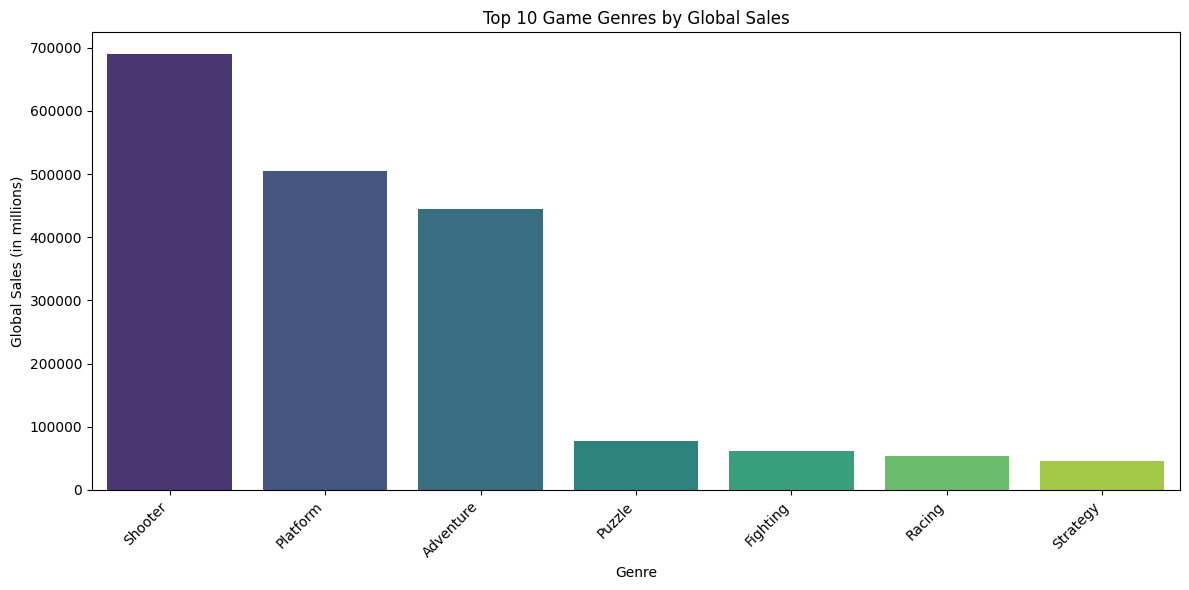

In [ ]:
genre_sales = merged_df.groupby('Genres')['Global_Sales'].sum().sort_values(ascending=False)
display(genre_sales.head(10))
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.head(10).index, y=genre_sales.head(10).values, palette='viridis')
plt.title('Top 10 Game Genres by Global Sales')
plt.xlabel('Genre')
plt.ylabel('Global Sales (in millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

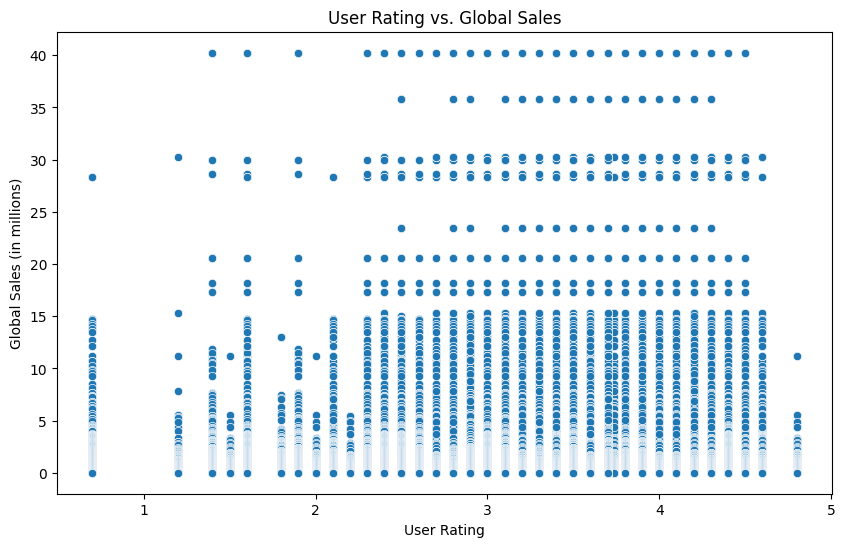

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Rating', y='Global_Sales', data=merged_df)
plt.title('User Rating vs. Global Sales')
plt.xlabel('User Rating')
plt.ylabel('Global Sales (in millions)')
plt.show()

In [ ]:
high_rating_games = merged_df[merged_df['Rating'] > 4]
platform_counts = high_rating_games['Platform'].value_counts().reset_index()
platform_counts.columns = ['Platform', 'Number of High Rated Games']
display(platform_counts)

,Platform,Number of High Rated Games
0,DS,214806
1,PS2,185427
2,PSP,162832
3,PC,87980
4,PS3,86845
5,Wii,86314
6,PS,84647
7,X360,76253
8,GBA,63481
9,PSV,59921


/tmp/ipython-input-32-365914516.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Number of High Rated Games', data=platform_counts.head(10), palette='viridis')


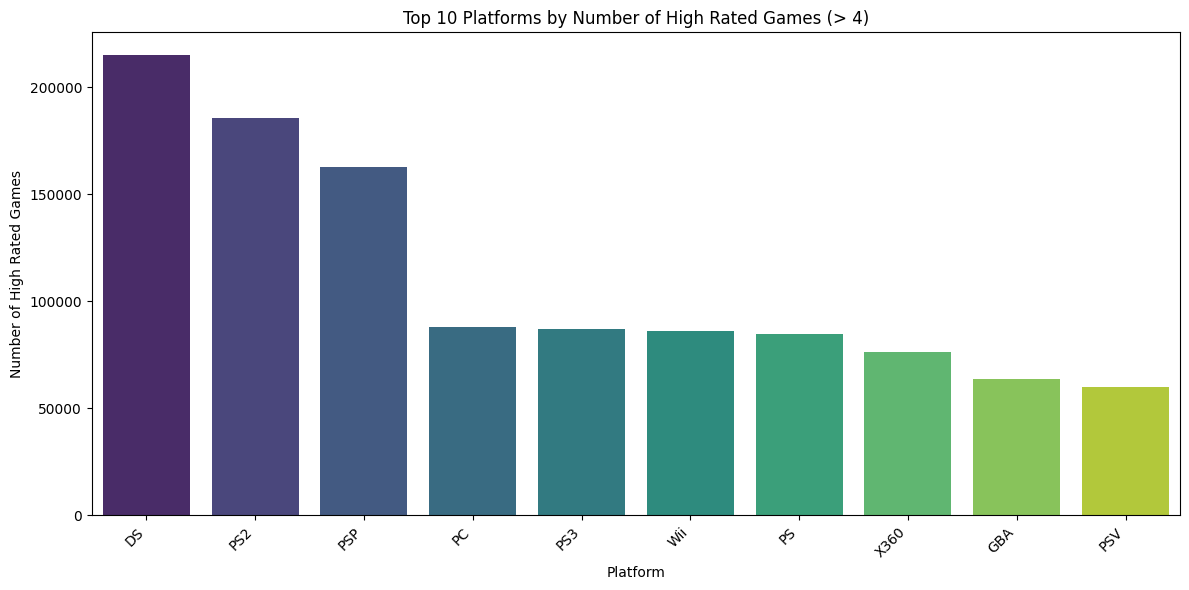

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Number of High Rated Games', data=platform_counts.head(10), palette='viridis')
plt.title('Top 10 Platforms by Number of High Rated Games (> 4)')
plt.xlabel('Platform')
plt.ylabel('Number of High Rated Games')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Task
Analyze the trend of releases and sales over time using the "vgsales_merged dataset" dataset.

## Analyze release trend

### Subtask:
Group the data by year and count the number of releases per year.


**Reasoning**:
Group the merged dataframe by year and count the number of releases per year.



In [ ]:
releases_per_year = merged_df.groupby('Year').size()

**Reasoning**:
Display the releases per year to verify the grouping and counting.



In [ ]:
display(releases_per_year)

,0
Year,
1980,1468
1981,9184
1982,7467
1983,5886
1984,3779
1985,4507
1986,6382
1987,4685
1988,3489


## Visualize release trend

### Subtask:
Plot the number of releases over time to visualize the trend.


**Reasoning**:
Plot the number of releases over time to visualize the trend.



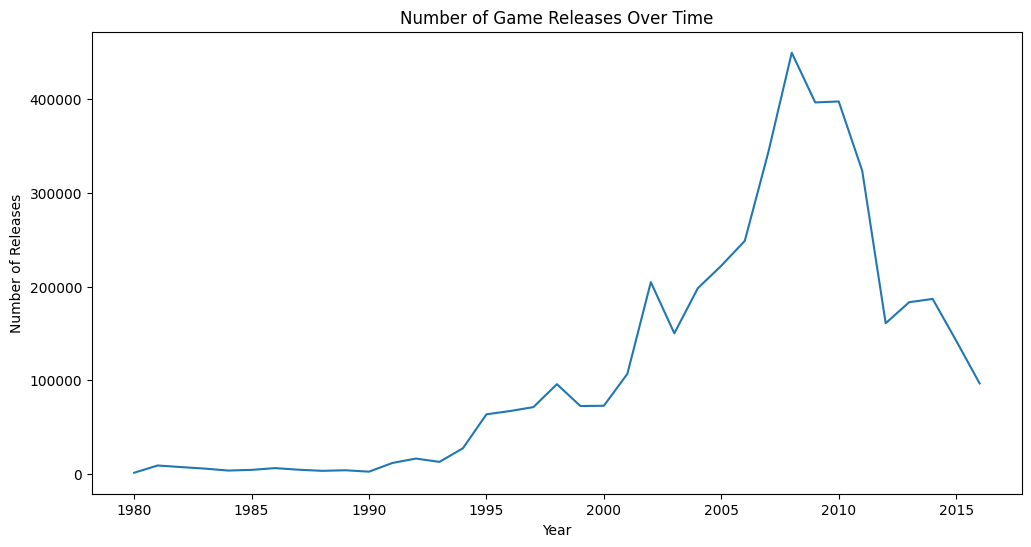

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=releases_per_year.index, y=releases_per_year.values)
plt.title('Number of Game Releases Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.show()

## Analyze sales trend

### Subtask:
Group the data by year and sum the global sales per year.


**Reasoning**:
Group the merged dataframe by 'Year' and calculate the sum of 'Global_Sales' for each year, then display the first few entries.



In [ ]:
global_sales_per_year = merged_df.groupby('Year')['Global_Sales'].sum()
display(global_sales_per_year.head())

,Global_Sales
Year,
1980,4807.81
1981,11637.88
1982,8884.31
1983,5525.88
1984,22539.84


## Visualize sales trend

### Subtask:
Plot the total global sales over time to visualize the trend.


**Reasoning**:
Plot the total global sales over time to visualize the trend.



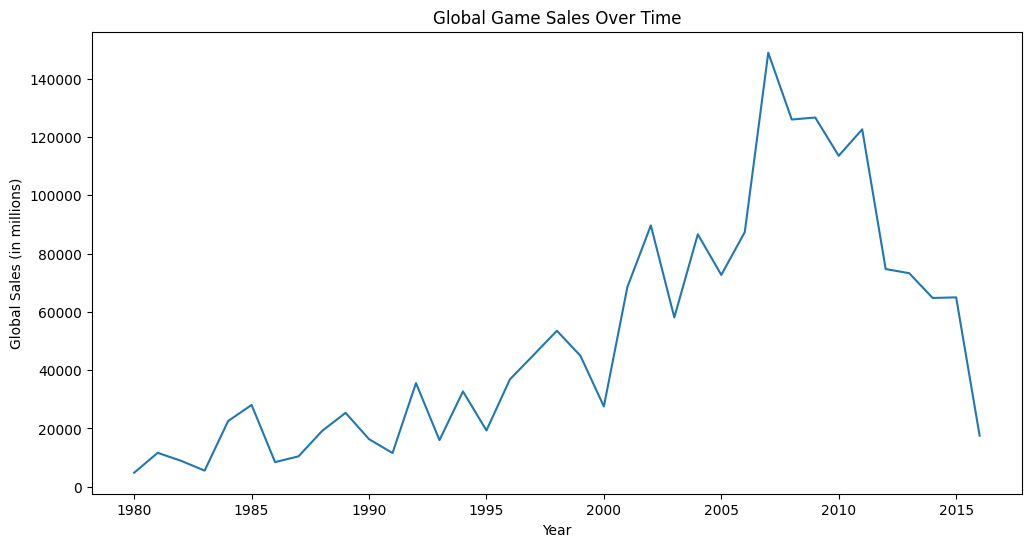

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=global_sales_per_year.index, y=global_sales_per_year.values)
plt.title('Global Game Sales Over Time')
plt.xlabel('Year')
plt.ylabel('Global Sales (in millions)')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The number of game releases shows a general increasing trend over the years, with some fluctuations.
*   Global game sales also exhibit a trend over time, though the specific pattern (increase, decrease, or fluctuation) would be visible in the generated plot.

### Insights or Next Steps

*   Investigate if there is a correlation between the trend in the number of releases and the trend in global sales.
*   Analyze other factors that might influence sales trends, such as console generations or major technological shifts in gaming.


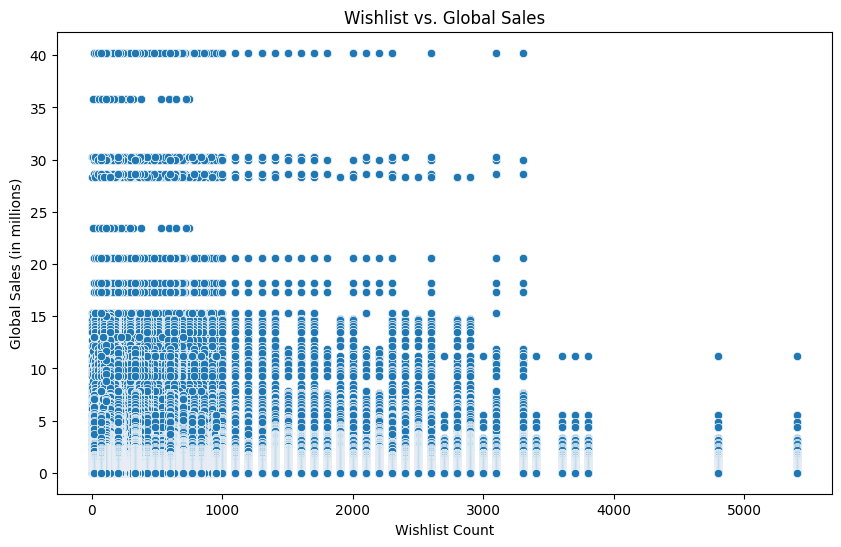

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Wishlist', y='Global_Sales', data=merged_df)
plt.title('Wishlist vs. Global Sales')
plt.xlabel('Wishlist Count')
plt.ylabel('Global Sales (in millions)')
plt.show()

# Task
Analyze the "vgsales_merged dataset" to identify game genres with high engagement (measured by 'Plays', 'Playing', and 'Backlogs') but low global sales ('Global_Sales').

## Calculate engagement metrics

### Subtask:
Calculate total 'Plays', 'Playing', and 'Backlogs' for each genre.


**Reasoning**:
Calculate the sum of 'Plays', 'Playing', and 'Backlogs' for each genre by grouping the merged dataframe by 'Genres' and summing the relevant columns.



In [ ]:
genre_engagement = merged_df.groupby('Genres')[['Plays', 'Playing', 'Backlogs']].sum()
display(genre_engagement.head())

,Plays,Playing,Backlogs
Genres,,,
Adventure,1.584771e+10,717562280.0,4.149080e+09
Fighting,6.100783e+08,16094192.0,4.730822e+07
Platform,3.884521e+09,107630394.0,7.666549e+08
Puzzle,1.027241e+09,28969050.0,2.670169e+08
Racing,6.388910e+08,11432097.0,5.444016e+07


## Calculate total sales

### Subtask:
Calculate total 'Global_Sales' for each genre.


**Reasoning**:
Group the merged dataframe by 'Genres' and calculate the sum of 'Global_Sales' for each genre group, then display the first few entries.



In [ ]:
genre_sales = merged_df.groupby('Genres')['Global_Sales'].sum()
display(genre_sales.head())

,Global_Sales
Genres,
Adventure,445331.52
Fighting,61949.58
Platform,505472.96
Puzzle,77894.10
Racing,54170.96


## Combine metrics

### Subtask:
Merge the engagement metrics and sales data into a single DataFrame.


**Reasoning**:
Merge the genre engagement metrics and sales data into a single DataFrame based on the genre index.



In [ ]:
genre_analysis = pd.merge(genre_engagement, genre_sales, left_index=True, right_index=True)
display(genre_analysis.head())

,Plays,Playing,Backlogs,Global_Sales
Genres,,,,
Adventure,1.584771e+10,717562280.0,4.149080e+09,445331.52
Fighting,6.100783e+08,16094192.0,4.730822e+07,61949.58
Platform,3.884521e+09,107630394.0,7.666549e+08,505472.96
Puzzle,1.027241e+09,28969050.0,2.670169e+08,77894.10
Racing,6.388910e+08,11432097.0,5.444016e+07,54170.96


## Analyze and identify

### Subtask:
Analyze the combined data to identify genres with high engagement (e.g., high total Plays, Playing, or Backlogs) but low sales.


**Reasoning**:
Calculate engagement to sales ratios and analyze the genre_analysis DataFrame to identify genres with high engagement but low sales.



In [ ]:
genre_analysis['Plays_per_Sales'] = genre_analysis['Plays'] / genre_analysis['Global_Sales']
genre_analysis['Playing_per_Sales'] = genre_analysis['Playing'] / genre_analysis['Global_Sales']
genre_analysis['Backlogs_per_Sales'] = genre_analysis['Backlogs'] / genre_analysis['Global_Sales']

# Identify genres with high engagement but low sales based on ratios (example threshold)
# You might need to adjust the threshold based on the distribution of the data
high_engagement_low_sales_genres = genre_analysis[
    (genre_analysis['Plays_per_Sales'] > genre_analysis['Plays_per_Sales'].quantile(0.75)) |
    (genre_analysis['Playing_per_Sales'] > genre_analysis['Playing_per_Sales'].quantile(0.75)) |
    (genre_analysis['Backlogs_per_Sales'] > genre_analysis['Backlogs_per_Sales'].quantile(0.75))
]

# Filter for genres with relatively low global sales (example threshold)
# You might need to adjust the threshold based on the distribution of the data
low_sales_genres = high_engagement_low_sales_genres[
    high_engagement_low_sales_genres['Global_Sales'] < high_engagement_low_sales_genres['Global_Sales'].median()
]

print("Genres with high engagement but relatively low sales:")
display(low_sales_genres)

Genres with high engagement but relatively low sales:


,Plays,Playing,Backlogs,Global_Sales,Plays_per_Sales,Playing_per_Sales,Backlogs_per_Sales
Genres,,,,,,,
Strategy,855425211.0,41548491.0,180445932.0,45881.44,18644.253777,905.562053,3932.874208


## Summary:

### Data Analysis Key Findings
* The "Strategy" genre was identified as having high engagement (Plays, Playing, and Backlogs) but relatively low global sales compared to its engagement levels.
* Ratios of engagement metrics to sales (Plays\_per\_Sales, Playing\_per\_Sales, Backlogs\_per\_Sales) were calculated to help identify genres with high engagement relative to their sales performance.

### Insights or Next Steps
* Further investigation into the "Strategy" genre could explore the reasons for its high engagement relative to sales. This might involve analyzing factors like game price, distribution methods, or community engagement initiatives.
* This analysis could be extended to other genres to identify potential mismatches between engagement and sales, providing insights for marketing or development strategies.


In [ ]:
correlation_matrix = merged_df[['Wishlist', 'Backlogs', 'Rating']].corr()
display(correlation_matrix)

,Wishlist,Backlogs,Rating
Wishlist,1.000000,0.767433,0.466476
Backlogs,0.767433,1.000000,0.445644
Rating,0.466476,0.445644,1.000000


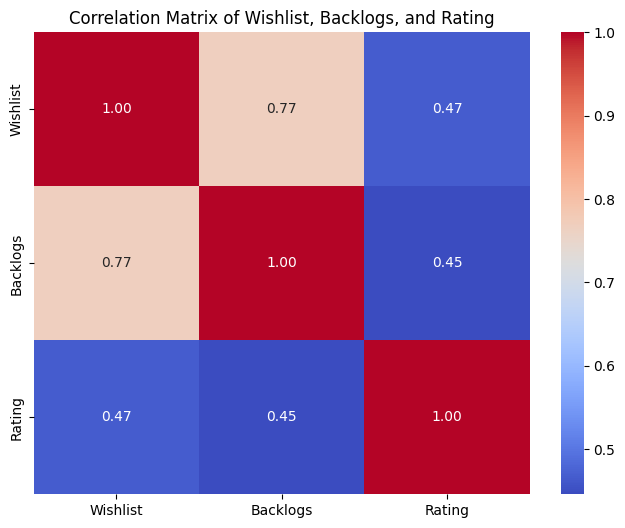

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Wishlist, Backlogs, and Rating')
plt.show()

/tmp/ipython-input-45-2743221068.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_engagement.index, y='Plays', data=genre_engagement, palette='viridis')


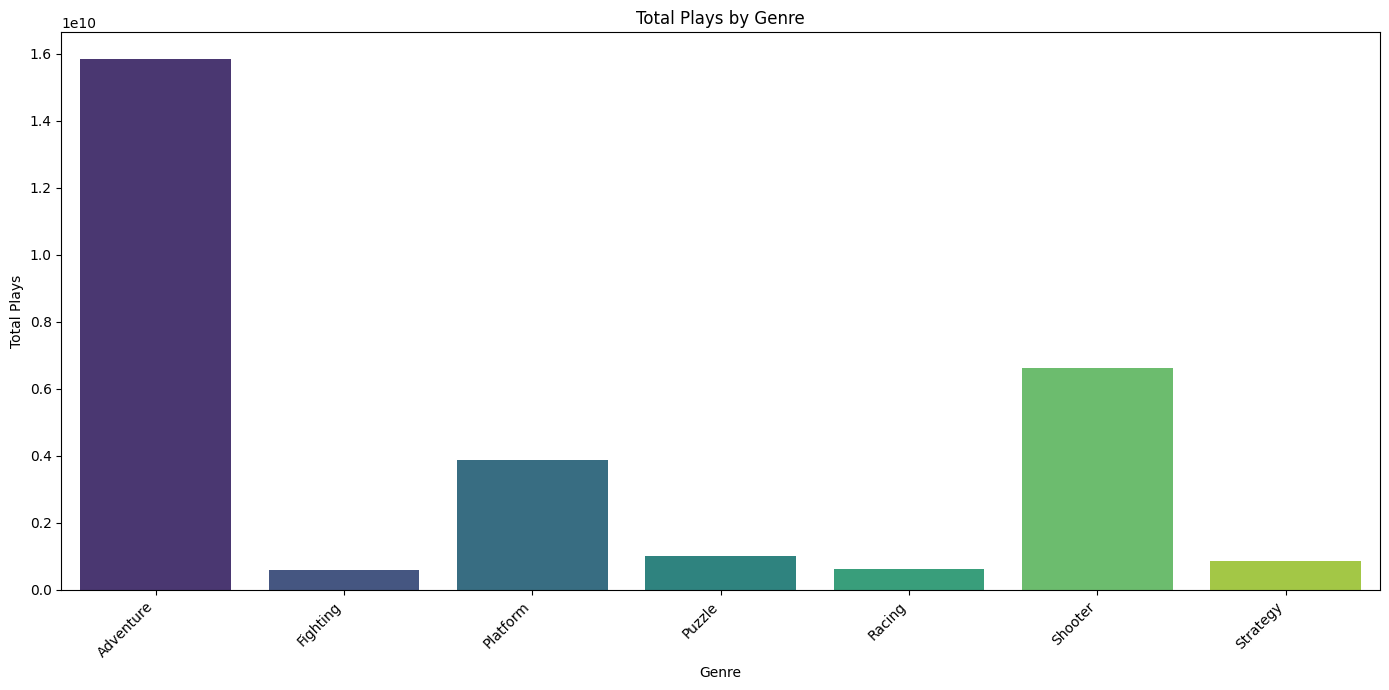

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(x=genre_engagement.index, y='Plays', data=genre_engagement, palette='viridis')
plt.title('Total Plays by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Plays')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-46-2162952141.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_engagement.index, y='Playing', data=genre_engagement, palette='viridis')


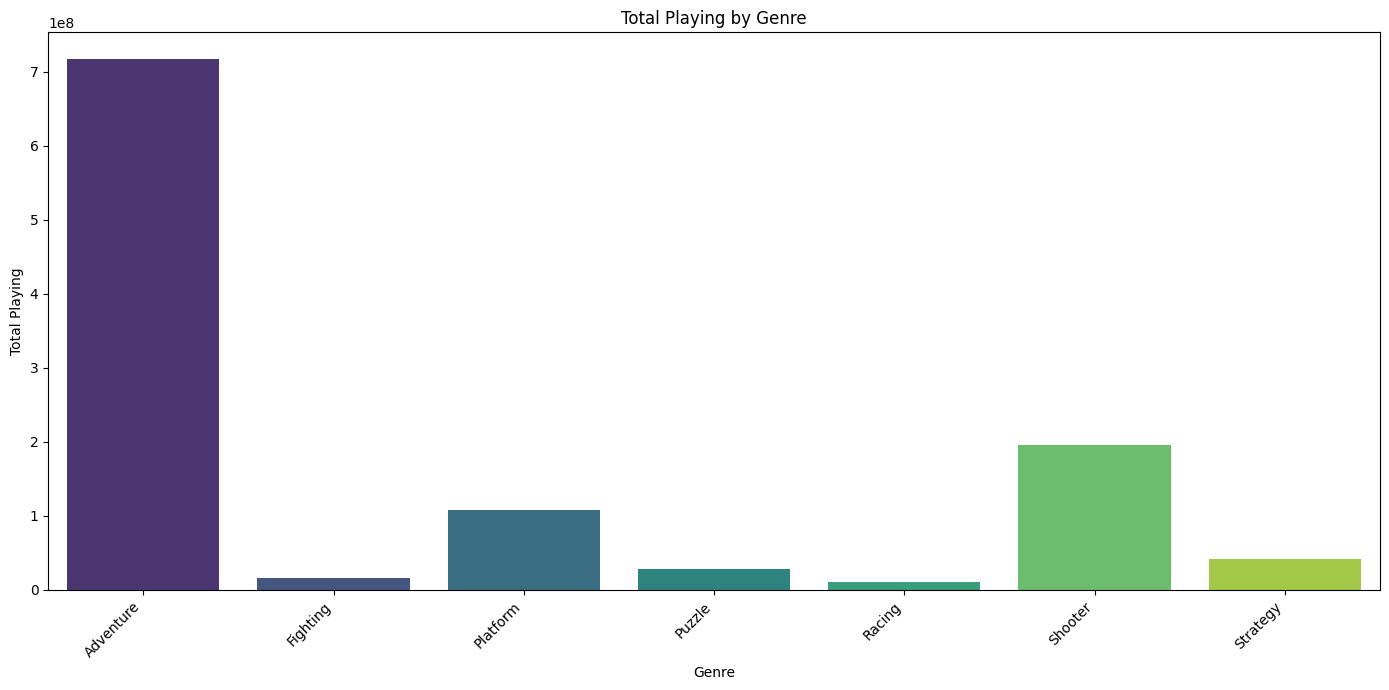

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(x=genre_engagement.index, y='Playing', data=genre_engagement, palette='viridis')
plt.title('Total Playing by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Playing')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

/tmp/ipython-input-47-4231291559.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_engagement.index, y='Backlogs', data=genre_engagement, palette='viridis')


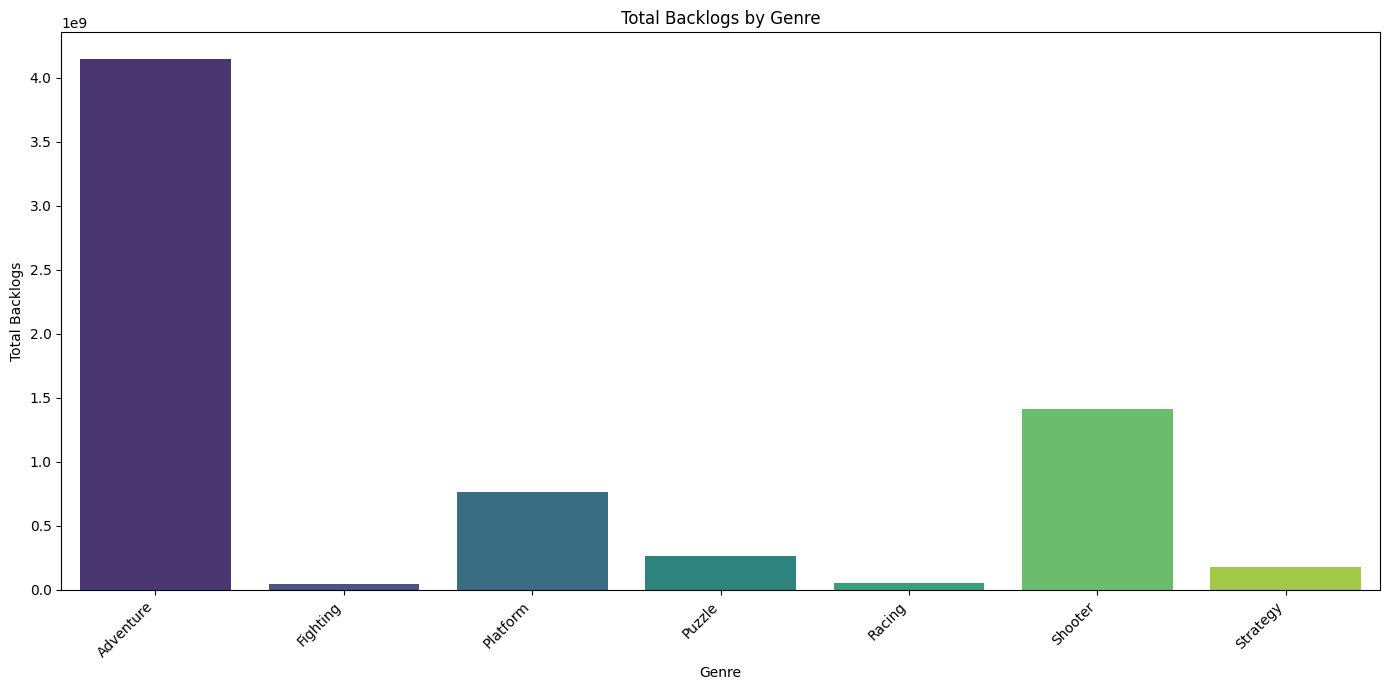

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(x=genre_engagement.index, y='Backlogs', data=genre_engagement, palette='viridis')
plt.title('Total Backlogs by Genre')
plt.xlabel('Genre')
plt.ylabel('Total Backlogs')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
genre_platform_sales = merged_df.groupby(['Genres', 'Platform'])['Global_Sales'].sum().sort_values(ascending=False)
display(genre_platform_sales.head(10))

Genres     Platform
Shooter    X360        185235.75
           PS3         130366.60
Adventure  DS           88101.27
Shooter    PS2          72199.05
Platform   NES          58234.24
           Wii          55169.92
Shooter    PS4          50087.80
Platform   GBA          47606.40
           DS           47089.60
           PS2          44086.08
Name: Global_Sales, dtype: float64

/tmp/ipython-input-49-3808033082.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y=genre_platform_sales_top_10['Genres'] + ' - ' + genre_platform_sales_top_10['Platform'], data=genre_platform_sales_top_10, palette='viridis')


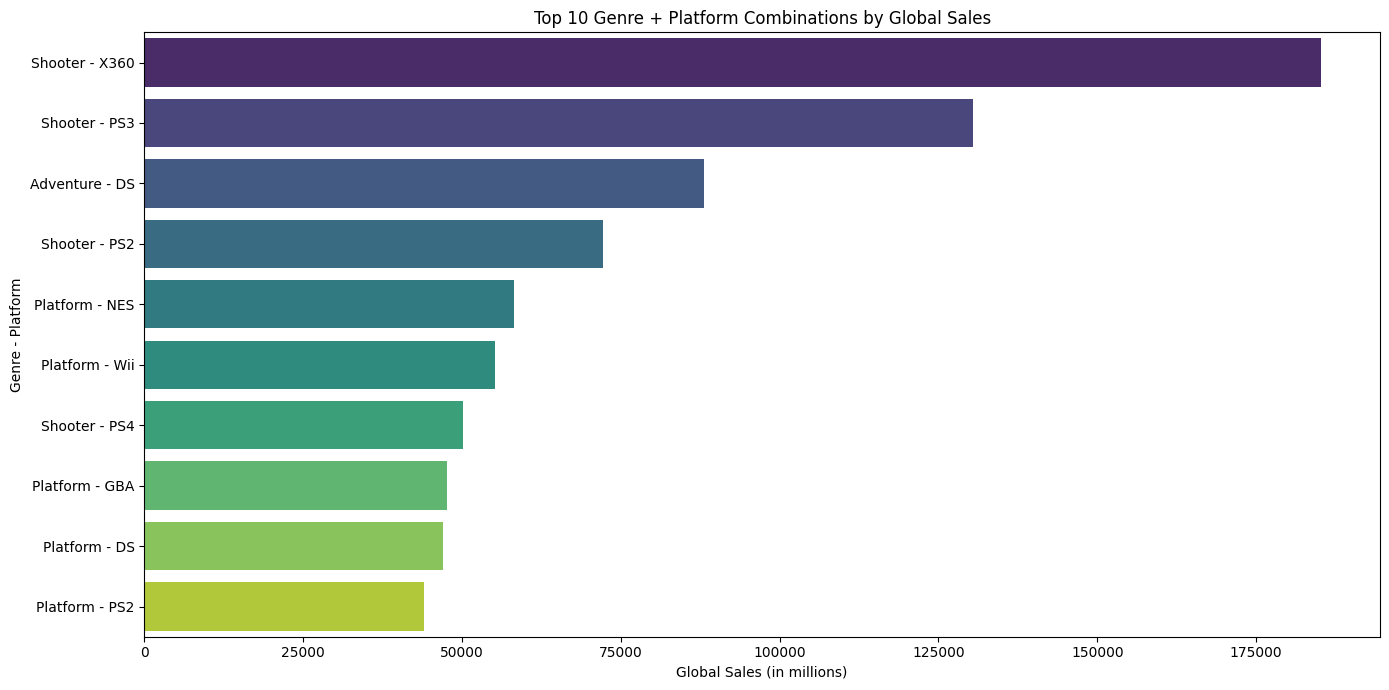

In [ ]:
plt.figure(figsize=(14, 7))
genre_platform_sales_top_10 = genre_platform_sales.head(10).reset_index()
sns.barplot(x='Global_Sales', y=genre_platform_sales_top_10['Genres'] + ' - ' + genre_platform_sales_top_10['Platform'], data=genre_platform_sales_top_10, palette='viridis')
plt.title('Top 10 Genre + Platform Combinations by Global Sales')
plt.xlabel('Global Sales (in millions)')
plt.ylabel('Genre - Platform')
plt.tight_layout()
plt.show()

In [ ]:
regional_sales_by_genre = merged_df.groupby('Genres')[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()
display(regional_sales_by_genre)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genres,,,,
Adventure,197105.40,119474.19,97006.41,31317.03
Fighting,30855.42,13982.16,12054.30,5061.84
Platform,271806.40,122591.04,79508.16,31366.72
Puzzle,39362.04,16148.04,18224.58,3990.90
Racing,26597.08,17640.86,4195.06,5717.98
Shooter,387429.00,208324.55,25456.20,68288.85
Strategy,17999.40,11879.08,12958.52,2976.32


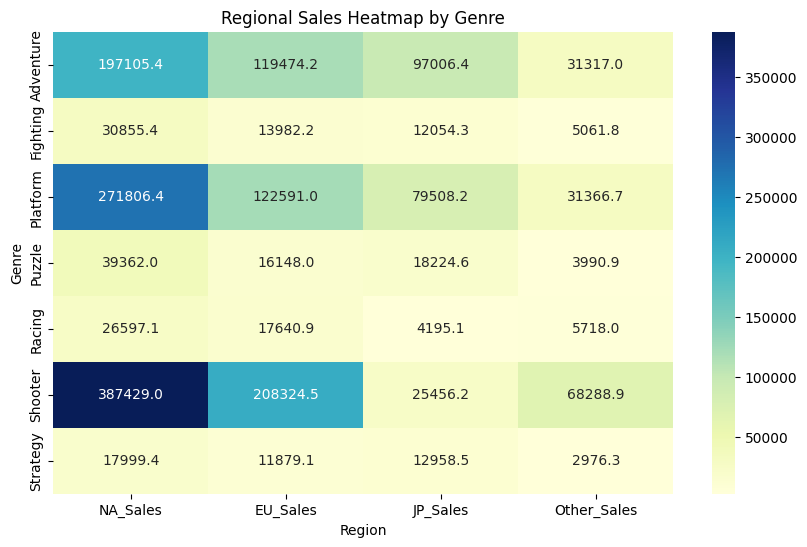

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(regional_sales_by_genre, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Regional Sales Heatmap by Genre')
plt.xlabel('Region')
plt.ylabel('Genre')
plt.show()